In [1]:
N = ord("D") % 3 + 1
N

3

# Лабораторна робота 1
# Тема: Дослідження та візуалізація даних за допомогою Python
# Мета: отримати базові навики використання Python для дослідження та візуалізації даних.
# Варіант 3. Дослідження втрат бронетранспортерів (БТР).

# Завдання 1

In [2]:
import csv
import numpy as np

def get_column_data(filename, column_name):
    with open(filename, 'r') as file:
        csvreader = csv.reader(file)
        headers = next(csvreader)
        column_index = headers.index(column_name)
        data = [float(row[column_index]) for row in csvreader if row[column_index]]
        
        return np.array(data)

# Завдання 2

In [3]:
losses_data = get_column_data('russia_losses_equipment.csv', 'APC').astype(float)
np.set_printoptions(threshold=np.inf)

losses_data

array([19870., 19841., 19823., 19799., 19772., 19751., 19736., 19707.,
       19675., 19675., 19644., 19616., 19596., 19589., 19571., 19535.,
       19518., 19472., 19450., 19419., 19397., 19369., 19355., 19339.,
       19306., 19304., 19256., 19236., 19209., 19192., 19156., 19143.,
       19119., 19092., 19059., 19021., 18994., 18968., 18947., 18896.,
       18847., 18766., 18726., 18697., 18661., 18612., 18592., 18581.,
       18538., 18523., 18487., 18470., 18450., 18433., 18404., 18395.,
       18355., 18332., 18287., 18254., 18229., 18199., 18175., 18111.,
       18072., 18053., 18002., 17969., 17939., 17895., 17876., 17827.,
       17800., 17765., 17751., 17740., 17710., 17679., 17658., 17627.,
       17596., 17579., 17547., 17503., 17476., 17438., 17396., 17344.,
       17304., 17292., 17252., 17222., 17170., 17132., 17093., 17080.,
       17077., 17071., 17063., 17043., 17003., 16955., 16938., 16925.,
       16906., 16897., 16878., 16878., 16869., 16848., 16821., 16786.,
      

# Завдання 3

In [4]:
def calculate_daily_losses(cumulative_losses):
    reversed_data = cumulative_losses[::-1]
    daily_changes = np.diff(reversed_data)
    daily_changes = np.insert(daily_changes, 0, reversed_data[0])
    
    return daily_changes.astype(float)

daily_apc_losses = calculate_daily_losses(losses_data)
daily_apc_losses

array([516., 190.,   0., 110.,  30.,  16.,  38.,  39.,   6.,  40.,  14.,
        37.,  34.,  35.,  60.,  40.,  21.,  23.,  30.,  96.,  60.,  13.,
        22.,  17.,  48.,  21.,  22.,  19.,  28.,  15.,  24.,  30.,  16.,
        13.,  12.,  16.,  25.,  54.,  14.,  14.,   3.,  30.,   0.,   4.,
        16.,  12.,  23.,  18.,   4.,   8.,   6.,  20.,  39.,  22.,  24.,
        31.,  44.,  43.,  33.,  20.,  50.,  34.,  47.,  29.,  27.,  26.,
        48.,  48.,  43.,  41.,  35.,  27.,  28.,  23.,  44.,  48.,  17.,
        27.,  34.,  24.,  16.,  35.,  34.,  20.,  27.,  26.,  25.,  25.,
        28.,  19.,  22.,  11.,  12.,  12.,  12.,  20.,  41.,  11.,  12.,
        13.,  13.,   8.,  16.,  13.,   9.,  12.,  16.,  18.,   8.,  11.,
        25.,  17.,  18.,  10.,   4.,  11.,  18.,   8.,  18.,   5.,   8.,
        14.,  28.,  17.,  16.,   6.,  10.,   1.,   7.,   0.,  28.,  17.,
         8.,  14.,   4.,   8.,   5.,   1.,   3.,   0.,  34.,   8.,   5.,
         7.,   6.,  13.,   7.,   8.,   9.,  13.,   

# Завдання 4

In [5]:
def top_five_losses():
    return np.sort(daily_apc_losses)[-5:][::-1]

print(top_five_losses())

[516. 190. 120. 110.  96.]


# Завдання 5

In [6]:
def summer_losses():
    return np.sum(daily_apc_losses[462:553])

summer_losses()

1126.0

# Завдання 6

In [7]:
def calculate_average_losses():
    return np.mean(daily_apc_losses[99:499])

calculate_average_losses()

11.4675

# Завдання 7

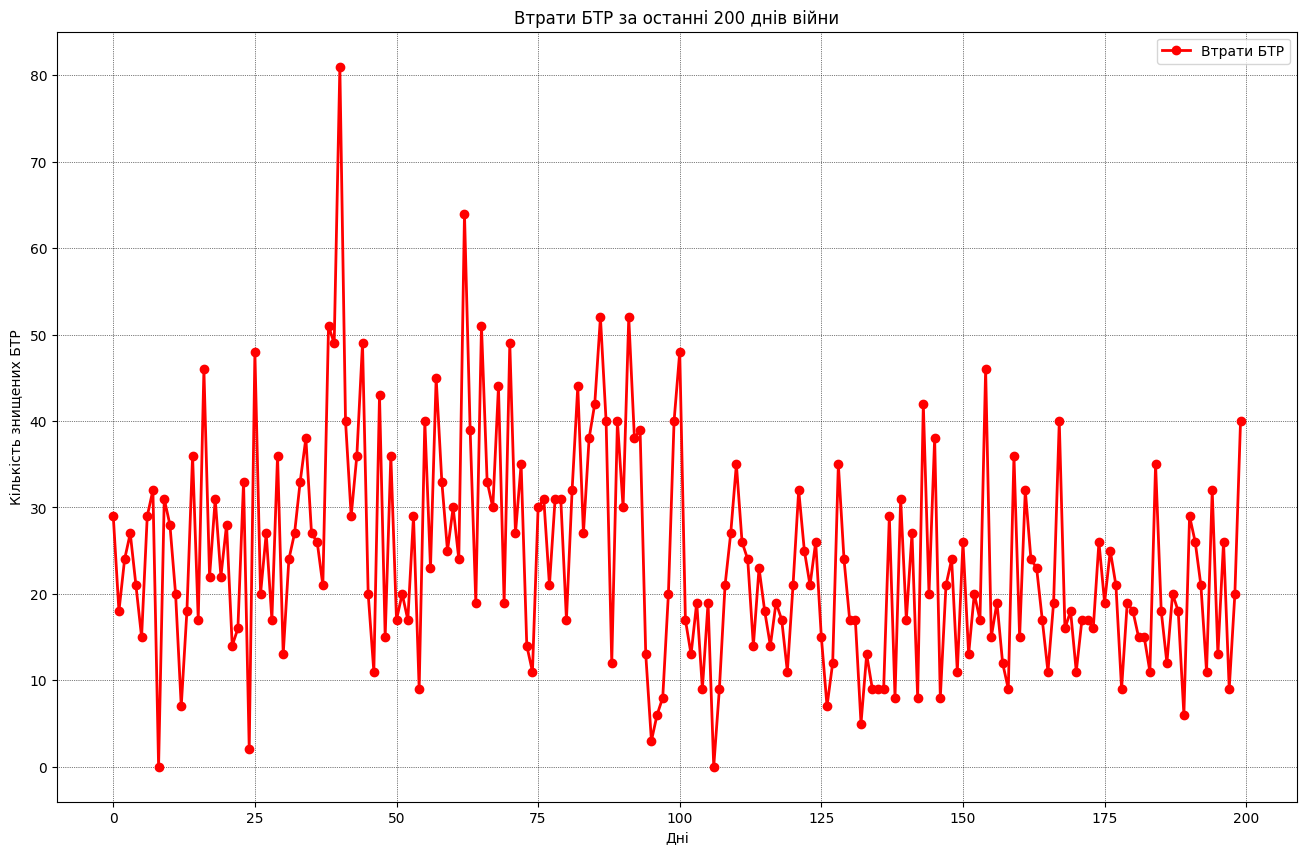

In [8]:
import matplotlib.pyplot as plt

def plot_apc_losses():
    losses_reversed = daily_apc_losses[::-1]
    last_200_losses = losses_reversed[:200]

    plt.figure(figsize=(16, 10), dpi=100)
    plt.plot(last_200_losses, marker='o', linestyle='-', color='red', label='Втрати БТР', linewidth=2)
    plt.title('Втрати БТР за останні 200 днів війни')
    plt.xlabel('Дні')
    plt.ylabel('Кількість знищених БТР')
    plt.legend(loc='upper right')
    plt.grid(True, color='black', linestyle=':', linewidth=0.5)
    plt.savefig('btr_losses_plot.png', dpi=100)
    plt.show()

plot_apc_losses()
